In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [3]:
df = pd.read_excel('Suicide_Detection_Fix_NoNumber.xlsx')
df['text']=df['text'].astype(str)
df['class']=df['class'].astype(str)

In [4]:
df

Suicide_Detection                                               text  \
0                      0  mantan istri mengancam bunuh diri barubaru ini...   
1                      1  aneh tidak terpengaruh pujian yang datang tahu...   
2                      2  akhirnya mendengar tahun buruk sumpah sialan m...   
3                      3      butuh bantuan tolong bantu aku menangis keras   
4                      4  saya hilanghalo adam tahun saya berjuang berta...   
...                  ...                                                ...   
33373              33400                                   hai remaja pasti   
33374              33401  bunuh diri nekat mengambil 1050mg wellbutrin 2...   
33375              33402  impulsif putus asa menuangkan h3arthi ive berp...   
33376              33403  semakin dekat melakukan bunuh diri berhenti be...   
33377              33404  ingin pemakamanketika mati tidak ingin pemakam...   

             class  
0          suicide  
1      non-suicide  
2      non-suicide  
3          suicide  
4          suicide  
...            ...  
33373  non-suicide  
33374      suicide  
33375      suicide  
33376  non-suicide  
33377      suicide  

[33378 rows x 3 columns]

In [5]:
# Initialize the lists
sentences = []
labels = []

# Collect sentences and labels into the lists
for i in range(df.shape[0]):
    sentences.append(df['text'][i])
    if df['class'][i] == 'non-suicide':
        labels.append(0)
    else:
        labels.append(1)

In [6]:
sentences

['mantan istri mengancam bunuh diri barubaru ini meninggalkan istri baik ditipu dua kali berbohong memutuskan menolak hari yang lalu mulai mengancam bunuh diri tanpa lelah menghabiskan harihari paat berbicara terus raguragu ingin percaya sakit datang tahu banyak orang mengancam ketertiban cara terjadi seharusnya menangani kematian tangan cinta istri kesepakatan ditipu terusmenerus merasa tidak aman saya khawatir hari ini harapan tidak terjadi',
 'aneh tidak terpengaruh pujian yang datang tahu saya merasa orang asing yang baik di internet',
 'akhirnya mendengar tahun buruk sumpah sialan menyebalkan',
 'butuh bantuan tolong bantu aku menangis keras',
 'saya hilanghalo adam tahun saya berjuang bertahuntahun saya takut tahuntahun terakhir pikiran bunuh diri ketakutan kecemasan saya batas dekat ive tenang lama saya takut datang perasaan keluarga tahun yang lalu kehilangan bibi dipicu perasaan seharihari putus asa kehilangan rasa bersalah halhal yang menyedihkan ive lifebut pikiran seperti s

In [7]:
training_size = 28000

# Split the sentences
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

# Split the labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
vocab_size = 35000
max_length = 300
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [9]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [9]:
training_padded

array([[ 393,  519, 1155, ...,    0,    0,    0],
       [ 180,    2, 1840, ...,    0,    0,    0],
       [ 101,  195,   15, ...,    0,    0,    0],
       ...,
       [ 198,   59, 1483, ...,    0,    0,    0],
       [3604,    2,    5, ...,    0,    0,    0],
       [ 330, 4797,  110, ...,    0,    0,    0]])

In [10]:
# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           2240000   
                                                                 
 bidirectional (Bidirectiona  (None, 300, 128)         66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,351,489
Trainable params: 2,351,489
Non-

In [11]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
875/875 [==============================] - 267s 300ms/step - loss: 0.2794 - accuracy: 0.8897 - val_loss: 0.2433 - val_accuracy: 0.9037
Epoch 2/10
875/875 [==============================] - 261s 298ms/step - loss: 0.1634 - accuracy: 0.9401 - val_loss: 0.2056 - val_accuracy: 0.9228
Epoch 3/10
875/875 [==============================] - 258s 295ms/step - loss: 0.1206 - accuracy: 0.9573 - val_loss: 0.2388 - val_accuracy: 0.9191
Epoch 4/10
875/875 [==============================] - 263s 301ms/step - loss: 0.0894 - accuracy: 0.9692 - val_loss: 0.2748 - val_accuracy: 0.9109
Epoch 5/10
875/875 [==============================] - 265s 303ms/step - loss: 0.0701 - accuracy: 0.9752 - val_loss: 0.3233 - val_accuracy: 0.9091
Epoch 6/10
875/875 [==============================] - 270s 308ms/step - loss: 0.0580 - accuracy: 0.9793 - val_loss: 0.3222 - val_accuracy: 0.9063
Epoch 7/10
875/875 [==============================] - 269s 308ms/step - loss: 0.0437 - accuracy: 0.9846 - val_loss: 0.3309 -

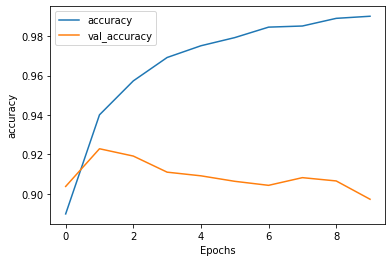

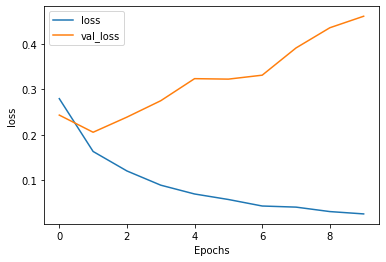

In [13]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
# Build the model
drop_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
drop_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           2240000   
                                                                 
 dropout (Dropout)           (None, 300, 64)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 128)         66048     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [15]:
# Set the training parameters
drop_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Train the model
drop_history = drop_model.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10
875/875 [==============================] - 268s 301ms/step - loss: 0.2858 - accuracy: 0.8897 - val_loss: 0.2497 - val_accuracy: 0.9182
Epoch 2/10
875/875 [==============================] - 263s 301ms/step - loss: 0.2014 - accuracy: 0.9281 - val_loss: 0.2081 - val_accuracy: 0.9212
Epoch 3/10
875/875 [==============================] - 286s 327ms/step - loss: 0.1572 - accuracy: 0.9450 - val_loss: 0.2016 - val_accuracy: 0.9243
Epoch 4/10
875/875 [==============================] - 285s 326ms/step - loss: 0.1278 - accuracy: 0.9559 - val_loss: 0.2326 - val_accuracy: 0.9154
Epoch 5/10
875/875 [==============================] - 266s 304ms/step - loss: 0.1107 - accuracy: 0.9630 - val_loss: 0.2280 - val_accuracy: 0.9189
Epoch 6/10
875/875 [==============================] - 306s 350ms/step - loss: 0.0932 - accuracy: 0.9684 - val_loss: 0.2480 - val_accuracy: 0.9178
Epoch 7/10
875/875 [==============================] - 292s 333ms/step - loss: 0.0805 - accuracy: 0.9728 - val_loss: 0.2507 -

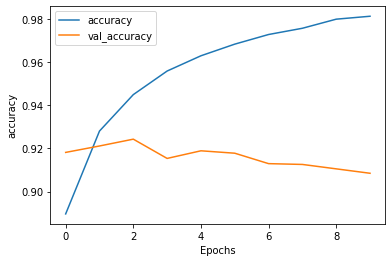

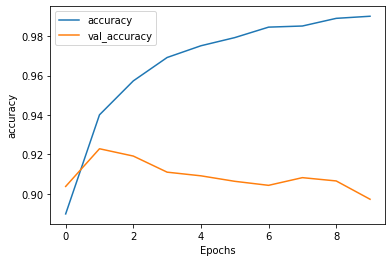

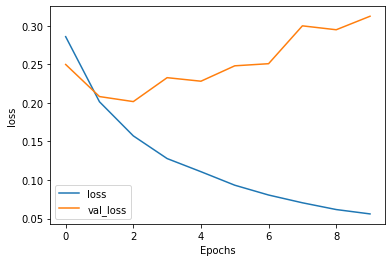

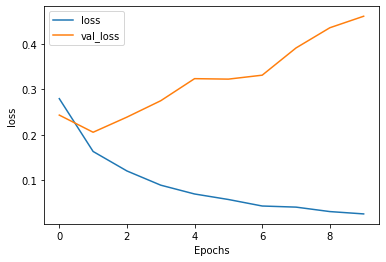

In [17]:
# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(drop_history, 'accuracy')
plot_graphs(history, 'accuracy')
plot_graphs(drop_history, 'loss')
plot_graphs(history, 'loss')

In [32]:
data = ["aku ingin bunuh diri",
        "aku tidak mati",
        "aku senang",
        "aku merasa sedih pacarku meninggalkanku",
        "hari ini aku senang tetapi kemudian aku merasa sedih karena aku mengapatkan kabar yang tidak baik",
        "aku berbohong",
        "dia jahat sekali",
        "hari ini menyebalkan",
        "aku merasa ingin bunuh diri",
        "aku sedih ingin bunuh diri"]
# Generate and pad the testing sequences
validation_sequences = tokenizer.texts_to_sequences(data)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [33]:
prediction = drop_model.predict(validation_padded)
print(prediction)

1/1 [==============================] - 0s 80ms/step
[[0.94179   ]
 [0.8158051 ]
 [0.16684796]
 [0.8953106 ]
 [0.8795789 ]
 [0.7889357 ]
 [0.83519953]
 [0.3471807 ]
 [0.9374061 ]
 [0.8774237 ]]


In [83]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(35000, 64)


In [84]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

In [86]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, 33822):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [34]:
!mkdir -p saved_model
drop_model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [35]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
drop_model.save('my_model.h5')

In [10]:
# save tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)